# 4. 신경망학습

In [1]:
import numpy as np

# 오차 제곱합

def SSE(y, t) :
    return 0.5 * np.sum((y-t)**2) 

In [2]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
y2 = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])


In [3]:
SSE(y1,t)

0.09750000000000003

In [4]:
SSE(y2, t)

0.5975

In [5]:
# cross entropy error






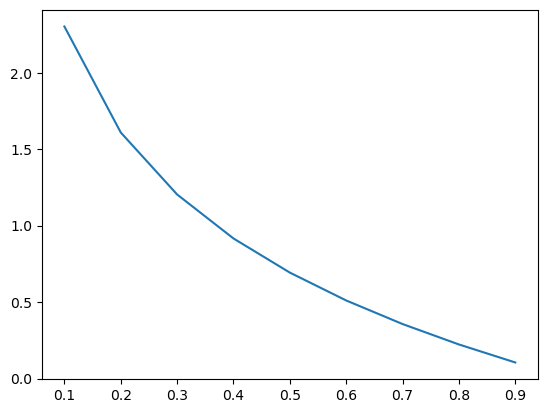

In [6]:
import matplotlib.pyplot as plt

x = np.arange(0.1, 1, 0.1)
y = -np.log(x)
plt.plot(x, y)
plt.show()

In [7]:
def cross_entropy(y,t) :
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) 

In [8]:
cross_entropy(y1,t)

0.510825457099338

In [9]:
cross_entropy(y2, t)

2.302584092994546

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pickle


In [11]:
# 0으로 채워진 길이 n의 리스트를 반환 
def zeros(n) :
    return [0 for i in range(n)]

# 1차원 넘파이 배열을 2차원 one_hot_enconding으로 반환 
# 주의 근데 여기서만 써야함
def one_hot_encoding_in_one_to_two(y, n) :
    output = []
    for i in y :
        row = zeros(n) 
        row[i] = 1
        output.append(row)
    return np.array(output)

# 주의 4장에서만 사용할 것
def get_data_with_one_hot_encoding() :
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    y = y.astype(int) 
    X = X.astype(np.float64)  # 나누기를 하기위해 타입변환
    X /= 255   #정규화, 0~1값으로 만들기

    y = one_hot_encoding_in_one_to_two(y, 10) # 1차원 넘파이 배열을 2차원 one_hot_enconding으로 반환 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
    
    return (X_train, y_train), (X_test, y_test)

In [12]:
(X_train, y_train), (X_test, y_test) = get_data_with_one_hot_encoding()

In [13]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [14]:
train_size = X_train.shape[0]
batch_size = 10

In [15]:
np.random.seed(42)
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]  
y_batch = y_train[batch_mask]

# 4.3 

In [16]:
# 잘못된 구현
def numerical_diff(f, x) :
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [17]:
# 보완된 구현
def numerical_diff(f, x) :
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def function_1(x) :
    return 0.01*x**2 + 0.1 * x

In [20]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

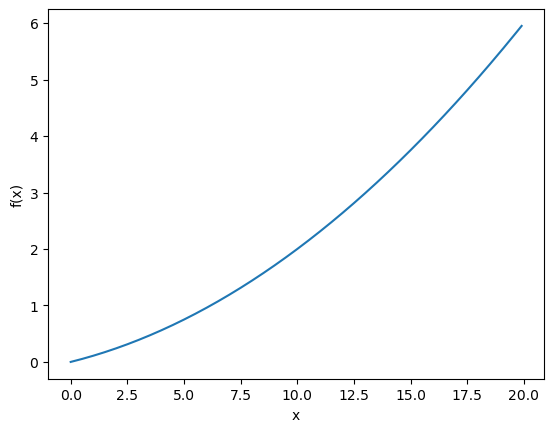

In [21]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [22]:
numerical_diff(function_1, 5)

0.1999999999990898

In [23]:
numerical_diff(function_1, 10)

0.2999999999986347

In [24]:
def tangent_line(f, point) : 
    slope = numerical_diff(f, point) 
    b = f(point) - slope * point
    return lambda x : slope * x + b 

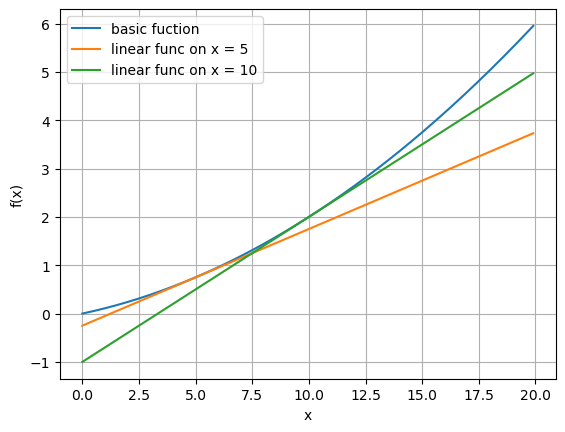

In [25]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
slope_func = tangent_line(function_1, 5) # 5인지점
y2 = slope_func(x)

slope_func2 = tangent_line(function_1, 10) # 10인지점
y3 = slope_func2(x)

plt.plot(x, y, label = "basic fuction")
plt.plot(x, y2, label = "linear func on x = 5")
plt.plot(x, y3, label = "linear func on x = 10")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# 4.3.3 partial differential 

In [26]:
def function_2(x) :
    return x[0]**2 + x[1]**2

In [27]:
def function_tmp1(x0) :
    return x0 * x0 + 4.0 **2.0

In [28]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [29]:
def function_tmp2(x1) :
    return 3.0**2.0 + x1*x1

In [30]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

# 4.4 gradient

In [31]:
def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h   #f(x+h)
        fxh_1 = f(x)
        x[idx] = tmp_val - h     #f(x-h)
        fxh_2 = f(x)

        grad[idx] = (fxh_1 - fxh_2) / (2*h)
        x[idx] = tmp_val

    return grad
    

In [32]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [33]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [34]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [35]:
# f(x0, x1) = x0**2 + x1**2   #vecter field

In [36]:
"""
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
grad = numerical_gradient(function_2, np.array([X, Y]))

plt.quiver(X, Y, -grad[0], -grad[1])
plt.show()
"""


'\nx = np.arange(-2, 2, 0.1)\ny = np.arange(-2, 2, 0.1)\nX, Y = np.meshgrid(x,y)\nX = X.flatten()\nY = Y.flatten()\ngrad = numerical_gradient(function_2, np.array([X, Y]))\n\nplt.quiver(X, Y, -grad[0], -grad[1])\nplt.show()\n'

# 4.4.1 경사법 
x_(i+1) = x_i - eta * df/dx_i

In [37]:
# f는 최적화 하려는 함수, init_x는 초깃값, lr는 learnging rate, step_num는 반복횟수
def gradient_descent(f, init_x, lr = 0.01, step_num = 100) :
    x = init_x
    for i in range(step_num) :
        grad = numerical_gradient(f, x)
        x = x - lr * grad
    return x
    

In [38]:
def function_2(x) :
    return x[0]**2 + x[1]**2

In [39]:
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [40]:
# 학습률이 너무 큰 예 :
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x =init_x, lr = 10, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [41]:
# 학습률이 너무 작은 예 : 
init_x = np.array([-3., -4.])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994, -3.99999992])

In [42]:
# 하이퍼 파라미터의 중요성!!

# 4.4.2 신경망에서의 기울기

In [43]:
# softmax함수 구현

def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    
def cross_entropy(y,t) :
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [44]:
#입력이 (2,)인 신경망 
class simpleNet:
    def __init__(self) :
        self.W = np.random.randn(2,3)  # 정규분포에서 초기화
        
    def predict(self, x) :
        return np.dot(x, self.W)
        
    def loss(self, x, t) :
        z = self.predict(x) 
        y = softmax(z)
        loss = cross_entropy(y,t)

        return loss

In [45]:
net = simpleNet()
print(net.W)

[[-0.094621   -0.9288281  -0.88523035]
 [-0.41218848 -0.4826188   0.16416482]]


In [46]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.42774223 -0.99165378 -0.38338987]


In [47]:
np.argmax(p)

2

In [48]:
t = np.array([0,0,1])  #정답레이블 

In [49]:
net.loss(x, t)

0.9166551419359746

In [50]:
def f(w) :
    return net.loss(x,  t)
"""
f = lambda w : net.loss(x, t)
dW = numberical_gradient(f, net.W)
"""


'\nf = lambda w : net.loss(x, t)\ndW = numberical_gradient(f, net.W)\n'

In [51]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001, 작은 값을 사용하여 수치 미분을 계산
    grad = np.zeros_like(x)  # x와 같은 모양의 배열을 생성하여 기울기 값을 저장할 공간 마련
    
    # x의 각 요소를 순차적으로 접근하기 위해 nditer 객체 생성
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:  # 모든 요소를 순회할 때까지 반복
        idx = it.multi_index  # 현재 위치 (인덱스) 가져오기
        tmp_val = x[idx]  # 현재 인덱스의 값을 임시로 저장
        
        # f(x + h) 계산
        x[idx] = float(tmp_val) + h  # x의 현재 위치에 작은 값 h를 더함
        fxh1 = f(x)  # f(x+h)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h  # x의 현재 위치에서 작은 값 h를 뺌
        fxh2 = f(x)  # f(x-h)
        
        # 기울기 계산: 중앙 차분 공식 (f(x+h) - f(x-h)) / (2*h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        # 원래 값 복원
        x[idx] = tmp_val
        it.iternext()  # 다음 요소로 이동
        
    return grad  # 계산된 기울기 반환


In [52]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.22950427  0.13058314 -0.36008741]
 [ 0.34425641  0.19587471 -0.54013112]]


# 4.5 학습 알고리즘 구현하기

In [53]:
import numpy as np

# 시그모이드 함수구현
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))


# softmax함수 구현
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


# 크로스 엔트로피 계산
def cross_entropy(y,t) :
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [54]:
 

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [55]:
class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01) :
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) 
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x) :
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t) :
        y = self.predict(x)
        
        return cross_entropy(y, t)

    def accuracy(self, x, t) :
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(y.shape[0])
        
        return accuracy


    def numerical_gradient(self, x, t) :
        loss_W = lambda W : self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [56]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [57]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [58]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

# 4.52 미니배치 학습 구현하기

In [ ]:
#입력층은 28*28
#출력층은 10(0~9)
# 첫번째 은닉층은 50개 두번째 은닉층은 100개로 임의로 정함
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 0으로 채워진 길이 n의 리스트를 반환 
def zeros(n) :
    return [0 for i in range(n)]

# 1차원 넘파이 배열을 2차원 one_hot_enconding으로 반환 
# 주의 근데 여기서만 써야함
def one_hot_encoding_in_one_to_two(y, n) :
    output = []
    for i in y :
        row = zeros(n) 
        row[i] = 1
        output.append(row)
    return np.array(output)

# 주의 4장에서만 사용할 것
def get_data_with_one_hot_encoding() :
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target
    y = y.astype(int) 
    X = X.astype(np.float64)  # 나누기를 하기위해 타입변환
    X /= 255   #정규화, 0~1값으로 만들기

    y = one_hot_encoding_in_one_to_two(y, 10) # 1차원 넘파이 배열을 2차원 one_hot_enconding으로 반환 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
    
    return (X_train, y_train), (X_test, y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = get_data_with_one_hot_encoding()

In [ ]:
train_loss_list = []

#하이퍼 파라미터
iters_num = 1000   #반복횟수
train_size = X_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

#hidden_size는 10으로 해버린다.
network = TwoLayerNet(input_size=784, hidden_size=10, output_size=10)


#경사하강법 훈련하기
for i in range(iters_num) :
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    #기울기 계산
    grad = network.numerical_gradient(X_batch, y_batch)

    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2') :
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss) 

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.show()


In [ ]:
train_loss_list = []
train_acc_list = []
test_acc_list = []


#하이퍼 파라미터
iters_num = 10000   #반복횟수
train_size = X_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

#hidden_size는 10으로 해버린다.
network2 = TwoLayerNet(input_size=784, hidden_size=10, output_size=10)


# 1에폭당 반복수
iter_per_epoch = max(train_size//batch_size, 1)


#경사하강법 훈련하기
for i in range(iters_num) :
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    # 기울기 계산
    grad = network2.numerical_gradient(X_batch, y_batch)

    #매개변수갱신
    for key in ('W1', 'b1', 'W2', 'b2') :
        network2.params[key] -= learning_rate * grad[key]

    #학습 경과 기록
    loss = network2.loss(X_batch, y_batch)
    train_loss_list.append(loss)


    #1에폭당 정확도 계산
    if i % iter_per_epoch == 0 :
        train_acc = network2.accuracy(X_train, y_train)
        test_acc = network2.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "+ str(train_acc)+", "+str(test_acc))
    


In [ ]:
x1 = np.arange(len(train_acc_list))
x2 = np.arange(len(test_acc_list))

plt.plot(x1, train_acc_list, linestyle = '-')
plt.plot(x2, test_acc_list, linestyle = '--')
plt.show()